Data Shape: (768, 10)
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Glucose2']
Data Shape: (768, 9)


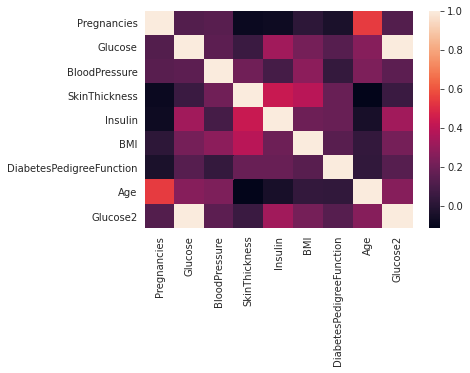

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
import math
import random
sns.set_style("darkgrid")

np.random.seed(1969)

data = pd.read_csv("diabetes.csv", encoding="latin-1")

data["Glucose2"] = data["Glucose"] # Important Feature 
data.dropna(inplace=True)
print("Data Shape:", data.shape)
data = pd.get_dummies(data)
target = np.array(data["Outcome"])
data = data.drop("Outcome", axis=1)
data_list = list(data.columns)
print(data_list)

corr = data.corr()
sns.heatmap(corr)

train_x, test_x, train_y, test_y = train_test_split(data, target, test_size = 0.2, random_state=42)
print("Data Shape:", data.shape)

In [68]:
# Decision Tree
clsfr = DecisionTreeClassifier()
# Train
clsfr = clsfr.fit(train_x, train_y)
# Predict
pred_tree = clsfr.predict(test_x)
pred_prob_tree = clsfr.predict_proba(test_x)[:,1]

# Metrics
print(confusion_matrix(test_y, pred_tree))
print("Accuracy Score:", accuracy_score(test_y, pred_tree))
print("Auc Score:", roc_auc_score(test_y, pred_tree))
print("Auc Score Prob:", roc_auc_score(test_y, pred_prob_tree))
print("Recall Score:", recall_score(test_y, pred_tree))
print("Precission Score:", precision_score(test_y, pred_tree))
print("F1 Score:", f1_score(test_y, pred_tree))

feature_import = pd.DataFrame(clsfr.feature_importances_, index=train_x.columns,
                    columns=["Importance"]).sort_values("Importance", ascending=False)
print(feature_import)

[[76 23]
 [15 40]]
Accuracy Score: 0.7532467532467533
Auc Score: 0.7474747474747476
Auc Score Prob: 0.7474747474747476
Recall Score: 0.7272727272727273
Precission Score: 0.6349206349206349
F1 Score: 0.6779661016949152
                          Importance
Glucose                     0.270400
BMI                         0.175202
BloodPressure               0.128030
Age                         0.104419
DiabetesPedigreeFunction    0.096363
Glucose2                    0.072016
SkinThickness               0.061861
Insulin                     0.055605
Pregnancies                 0.036104


In [69]:
# Random Forest
frst = RandomForestClassifier(n_estimators=100, max_features=5)
frst = frst.fit(train_x, train_y)

pred_frst = frst.predict(test_x)
frst_pred_prob = frst.predict_proba(test_x)[:,1]

print(confusion_matrix(test_y, pred_frst))
print("Accuracy:",metrics.accuracy_score(test_y, pred_frst))
print ("AUC Score:", roc_auc_score(test_y, pred_frst))
print ("AUC Score prob:", roc_auc_score(test_y, frst_pred_prob))
print ("Precision:", precision_score(test_y, pred_frst))
print ("Recall:", recall_score(test_y, pred_frst))
print ("F1 Score:", f1_score(test_y, pred_frst))

feature_importances = pd.DataFrame(frst.feature_importances_,
                                  index = train_x.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)


[[78 21]
 [19 36]]
Accuracy: 0.7402597402597403
AUC Score: 0.7212121212121212
AUC Score prob: 0.8165289256198347
Precision: 0.631578947368421
Recall: 0.6545454545454545
F1 Score: 0.6428571428571428
                          importance
Glucose2                    0.205899
Glucose                     0.160971
BMI                         0.152257
Age                         0.122774
DiabetesPedigreeFunction    0.109740
BloodPressure               0.078133
Pregnancies                 0.061417
Insulin                     0.055883
SkinThickness               0.052925


In [70]:
# Gradient Boosting
grd = GradientBoostingClassifier(n_estimators=100, random_state=42)

grd = grd.fit(train_x,train_y)

#Predict the response for test dataset
pred_grd = grd.predict(test_x)
grd_pred_prob = grd.predict_proba(test_x)[:,1]

print(confusion_matrix(test_y, pred_grd))
print("Accuracy:",metrics.accuracy_score(test_y, pred_grd))
print ("AUC Score:", roc_auc_score(test_y, pred_grd))
print ("AUC Score prob:", roc_auc_score(test_y, grd_pred_prob))
print ("Precision:", precision_score(test_y, pred_grd))
print ("Recall:", recall_score(test_y, pred_grd))
print ("F1 Score:", f1_score(test_y, pred_grd))

feature_importances = pd.DataFrame(grd.feature_importances_,
                                  index = train_x.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)

[[78 21]
 [18 37]]
Accuracy: 0.7467532467532467
AUC Score: 0.7303030303030302
AUC Score prob: 0.8082644628099173
Precision: 0.6379310344827587
Recall: 0.6727272727272727
F1 Score: 0.6548672566371682
                          importance
Glucose2                    0.209488
BMI                         0.186733
Glucose                     0.180517
Age                         0.156714
DiabetesPedigreeFunction    0.112196
Insulin                     0.051858
BloodPressure               0.049658
Pregnancies                 0.028670
SkinThickness               0.024166


In [71]:
corr.iloc[1]

Pregnancies                 0.129459
Glucose                     1.000000
BloodPressure               0.152590
SkinThickness               0.057328
Insulin                     0.331357
BMI                         0.221071
DiabetesPedigreeFunction    0.137337
Age                         0.263514
Glucose2                    1.000000
Name: Glucose, dtype: float64

Data2 Shape: (768, 9)
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Data2 Shape: (768, 8)


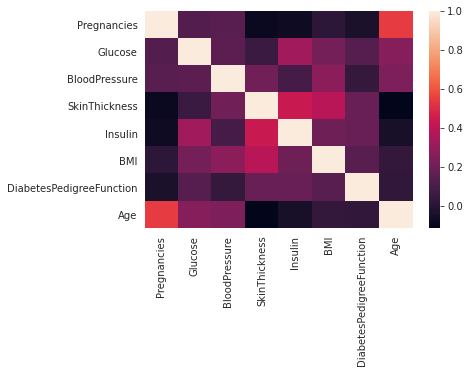

In [76]:
data2 = pd.read_csv("diabetes.csv", encoding="latin-1")

data2.dropna(inplace=True)
print("Data2 Shape:", data2.shape)
data2 = pd.get_dummies(data2)
target2 = np.array(data2["Outcome"])
data2 = data2.drop("Outcome", axis=1)
data2_list = list(data2.columns)
print(data2_list)

corr = data2.corr()
sns.heatmap(corr)

train_x2, test_x2, train_y2, test_y2 = train_test_split(data2, target2, test_size = 0.2, random_state=42)
print("Data2 Shape:", data2.shape)

In [77]:
# Decision Tree
clsfr2 = DecisionTreeClassifier()
# Train
clsfr2 = clsfr2.fit(train_x2, train_y2)
# Predict
pred_tree2 = clsfr2.predict(test_x2)
pred_prob_tree2 = clsfr2.predict_proba(test_x2)[:,1]

# Metrics
print(confusion_matrix(test_y2, pred_tree2))
print("Accuracy Score:", accuracy_score(test_y2, pred_tree2))
print("Auc Score:", roc_auc_score(test_y2, pred_tree2))
print("Auc Score Prob:", roc_auc_score(test_y2, pred_prob_tree2))
print("Recall Score:", recall_score(test_y2, pred_tree2))
print("Precission Score:", precision_score(test_y2, pred_tree2))
print("F1 Score:", f1_score(test_y2, pred_tree2))

feature_import2 = pd.DataFrame(clsfr2.feature_importances_, index=train_x2.columns,
                    columns=["Importance"]).sort_values("Importance", ascending=False)
print(feature_import2)

"""
Old Performance
Accuracy Score: 0.7532467532467533
Auc Score: 0.7474747474747476
Auc Score Prob: 0.7474747474747476
Recall Score: 0.7272727272727273
Precission Score: 0.6349206349206349
F1 Score: 0.6779661016949152

"""

[[80 19]
 [18 37]]
Accuracy Score: 0.7597402597402597
Auc Score: 0.7404040404040404
Auc Score Prob: 0.7404040404040404
Recall Score: 0.6727272727272727
Precission Score: 0.6607142857142857
F1 Score: 0.6666666666666666
                          Importance
Glucose                     0.296493
BMI                         0.182613
BloodPressure               0.149955
Age                         0.111891
DiabetesPedigreeFunction    0.106507
Insulin                     0.064336
Pregnancies                 0.053117
SkinThickness               0.035088


In [78]:
# Random Forest
frst2 = RandomForestClassifier(n_estimators=100, max_features=5)
frst2 = frst2.fit(train_x2, train_y2)

pred_frst2 = frst2.predict(test_x2)
frst_pred_prob2 = frst2.predict_proba(test_x2)[:,1]

print(confusion_matrix(test_y2, pred_frst2))
print("Accuracy:",metrics.accuracy_score(test_y2, pred_frst2))
print ("AUC Score:", roc_auc_score(test_y2, pred_frst2))
print ("AUC Score prob:", roc_auc_score(test_y2, frst_pred_prob2))
print ("Precision:", precision_score(test_y2, pred_frst2))
print ("Recall:", recall_score(test_y2, pred_frst2))
print ("F1 Score:", f1_score(test_y2, pred_frst2))

feature_importances2 = pd.DataFrame(frst2.feature_importances_,
                                  index = train_x2.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances2)

"""
Accuracy: 0.7402597402597403
AUC Score: 0.7212121212121212
AUC Score prob: 0.8165289256198347
Precision: 0.631578947368421
Recall: 0.6545454545454545
F1 Score: 0.6428571428571428
"""

[[78 21]
 [18 37]]
Accuracy: 0.7467532467532467
AUC Score: 0.7303030303030302
AUC Score prob: 0.8190082644628099
Precision: 0.6379310344827587
Recall: 0.6727272727272727
F1 Score: 0.6548672566371682
                          importance
Glucose                     0.304686
BMI                         0.168382
Age                         0.144090
DiabetesPedigreeFunction    0.115443
BloodPressure               0.087698
SkinThickness               0.061463
Pregnancies                 0.059794
Insulin                     0.058443


In [79]:
# Gradient Boosting
grd2 = GradientBoostingClassifier(n_estimators=100, random_state=42)

grd2 = grd2.fit(train_x2,train_y2)

#Predict the response for test dataset
pred_grd2 = grd2.predict(test_x2)
grd_pred_prob2 = grd2.predict_proba(test_x2)[:,1]

print(confusion_matrix(test_y2, pred_grd2))
print("Accuracy:",metrics.accuracy_score(test_y2, pred_grd2))
print ("AUC Score:", roc_auc_score(test_y2, pred_grd2))
print ("AUC Score prob:", roc_auc_score(test_y2, grd_pred_prob2))
print ("Precision:", precision_score(test_y2, pred_grd2))
print ("Recall:", recall_score(test_y2, pred_grd2))
print ("F1 Score:", f1_score(test_y2, pred_grd2))

feature_importances2 = pd.DataFrame(grd2.feature_importances_,
                                  index = train_x2.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances2)

"""
Old Performance
Accuracy: 0.7467532467532467
AUC Score: 0.7303030303030302
AUC Score prob: 0.8082644628099173
Precision: 0.6379310344827587
Recall: 0.6727272727272727
F1 Score: 0.6548672566371682
"""

[[77 22]
 [18 37]]
Accuracy: 0.7402597402597403
AUC Score: 0.7252525252525254
AUC Score prob: 0.8084481175390267
Precision: 0.6271186440677966
Recall: 0.6727272727272727
F1 Score: 0.6491228070175439
                          importance
Glucose                     0.389621
BMI                         0.185406
Age                         0.156107
DiabetesPedigreeFunction    0.112469
Insulin                     0.053652
BloodPressure               0.049059
Pregnancies                 0.029574
SkinThickness               0.024113
